
Q1. What is Gradient Boosting Regression?
Gradient Boosting Regression is an ensemble learning technique in machine learning that builds a strong model by combining multiple weak models (usually decision trees). It builds the ensemble by iteratively training weak models to correct the errors of the combined models from previous iterations. The algorithm uses a gradient descent approach to minimize a loss function, typically mean squared error (MSE) in regression problems. Gradient boosting is widely used in predictive analytics because of its high accuracy and flexibility.

Q2. Implement a Simple Gradient Boosting Algorithm from Scratch Using Python and NumPy

Mean Squared Error: 46.046159908934605
R-squared: 0.9727603545400448


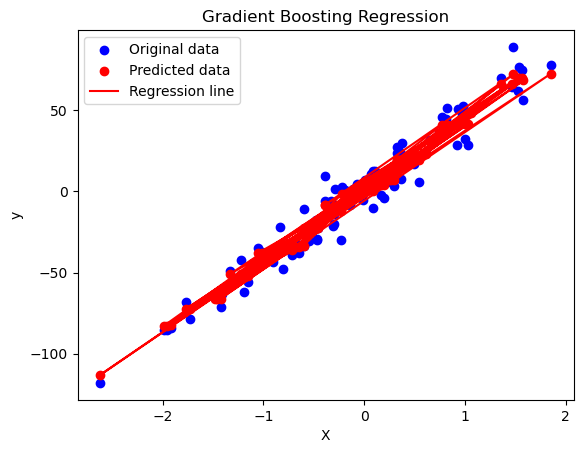

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

# Generate a toy regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Number of boosting rounds (number of weak learners to add)
n_estimators = 50

# Learning rate determines the contribution of each tree
learning_rate = 0.1

# Initialize predictions as zero
y_pred = np.zeros_like(y, dtype=float)

# Store the individual tree models
models = []

# Gradient boosting loop
for i in range(n_estimators):
    # Compute the pseudo-residuals (negative gradients)
    residuals = y - y_pred
    
    # Fit a simple decision tree to the residuals
    tree = DecisionTreeRegressor(max_depth=2)
    tree.fit(X, residuals)
    
    # Predict the residuals with the current tree
    y_pred += learning_rate * tree.predict(X)
    
    # Store the model for future predictions
    models.append(tree)

# Evaluate the model's performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the original data and the predicted regression line
plt.scatter(X, y, color='blue', label='Original data')
plt.scatter(X, y_pred, color='red', label='Predicted data')
plt.plot(X, y_pred, 'r-', label='Regression line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()


Q3. Experiment with Different Hyperparameters Such as Learning Rate, Number of Trees, and Tree Depth to Optimize Performance

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Set up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gb_regressor, param_grid, scoring='neg_mean_squared_error', cv=3)

# Perform grid search
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negated MSE for the actual value

print("Best Parameters:", best_params)
print("Best MSE:", best_score)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
Best MSE: 132.9113847397704


Q4. What is a Weak Learner in Gradient Boosting?
A weak learner in gradient boosting is a simple model that performs slightly better than random guessing. Typically, it's a decision tree with shallow depth (like a decision stump or a tree with few splits). These weak learners are used in gradient boosting because they can quickly fit data and provide essential corrections to the ensemble's overall prediction.

Q5. What is the Intuition Behind the Gradient Boosting Algorithm?

The intuition behind gradient boosting is to iteratively correct errors made by an ensemble of weak learners by modeling the residuals (errors) of the previous models. By sequentially adding models that target these residuals, the ensemble improves with each iteration. This approach is conceptually akin to using gradient descent in optimization, where you iteratively move toward a minimum in a loss function.

Q6. How Does the Gradient Boosting Algorithm Build an Ensemble of Weak Learners?

Gradient boosting builds an ensemble of weak learners by:

Starting with an Initial Prediction: Typically, this is the mean (for regression) or mode (for classification) of the target variable.
Computing the Residuals: At each iteration, the algorithm calculates the residuals, representing the errors in the current ensemble's predictions.
Training a Weak Learner on Residuals: A new weak learner is trained to predict these residuals, with the idea that it will correct errors made by the current ensemble.
Adding the Learner to the Ensemble: The new weak learner is added to the ensemble with a specified contribution (controlled by the learning rate).
Updating the Predictions: The predictions are updated by adding the contribution from the new weak learner.
Repeating: The process continues until a specified number of learners have been added or until the performance improvement stabilizes.


Q7. What Are the Steps Involved in Constructing the Mathematical Intuition of Gradient Boosting Algorithm?

Initial Prediction: The first step is to start with an initial prediction, typically the mean (in regression) or mode (in classification).
Compute Residuals: Calculate the residuals (the difference between the true values and current predictions).
Train Weak Learner: Train a weak learner on these residuals to capture patterns that explain the remaining errors.
Calculate Gradient: For each sample, calculate the gradient of the loss function. This provides the direction in which the predictions need to be adjusted.
Add the Contribution of the Weak Learner: Multiply the output of the weak learner by the learning rate and add it to the current predictions.
Repeat: Continue training new weak learners and adding their contributions to the ensemble, correcting errors along the way.
Minimize Loss Function: The goal is to minimize the specified loss function (e.g., mean squared error for regression), iteratively refining the ensemble's predictions through gradient descent.
Stopping Criteria: Determine when to stop adding weak learners. This could be after a specified number of iterations, when the performance improvement stabilizes, or through early stopping based on validation data.





